In [1]:
import os

In [2]:
data_dir ="C:\\Users\\Acer\\Desktop\\Self Study\\Reinforcement Learning\\cell_images"

In [3]:
os.listdir(data_dir)

['test', 'train']

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
from matplotlib.image import imread


In [6]:
test_path =data_dir+"\\test\\"
train_path =data_dir+"\\train\\"

In [7]:
test_path

'C:\\Users\\Acer\\Desktop\\Self Study\\Reinforcement Learning\\cell_images\\test\\'

In [8]:
os.listdir(test_path)

['parasitized', 'uninfected']

In [9]:
os.listdir(train_path+"parasitized")[:10]
           

['C100P61ThinF_IMG_20150918_144104_cell_162.png',
 'C100P61ThinF_IMG_20150918_144104_cell_163.png',
 'C100P61ThinF_IMG_20150918_144104_cell_164.png',
 'C100P61ThinF_IMG_20150918_144104_cell_165.png',
 'C100P61ThinF_IMG_20150918_144104_cell_166.png',
 'C100P61ThinF_IMG_20150918_144104_cell_167.png',
 'C100P61ThinF_IMG_20150918_144104_cell_168.png',
 'C100P61ThinF_IMG_20150918_144104_cell_169.png',
 'C100P61ThinF_IMG_20150918_144104_cell_170.png',
 'C100P61ThinF_IMG_20150918_144104_cell_171.png']

In [10]:
para_cell=train_path+"parasitized\\"+"C100P61ThinF_IMG_20150918_144104_cell_162.png"

In [11]:
para_cell

'C:\\Users\\Acer\\Desktop\\Self Study\\Reinforcement Learning\\cell_images\\train\\parasitized\\C100P61ThinF_IMG_20150918_144104_cell_162.png'

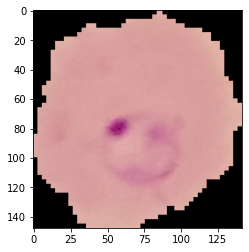

In [12]:
plt.imshow(imread(para_cell))

In [13]:
uninfected_cell=train_path+"uninfected\\"
uninfected_cell

'C:\\Users\\Acer\\Desktop\\Self Study\\Reinforcement Learning\\cell_images\\train\\uninfected\\'

In [14]:
os.listdir(train_path+"uninfected")[:10]

['C100P61ThinF_IMG_20150918_144104_cell_128.png',
 'C100P61ThinF_IMG_20150918_144104_cell_131.png',
 'C100P61ThinF_IMG_20150918_144104_cell_144.png',
 'C100P61ThinF_IMG_20150918_144104_cell_21.png',
 'C100P61ThinF_IMG_20150918_144104_cell_25.png',
 'C100P61ThinF_IMG_20150918_144104_cell_48.png',
 'C100P61ThinF_IMG_20150918_144104_cell_65.png',
 'C100P61ThinF_IMG_20150918_144348_cell_120.png',
 'C100P61ThinF_IMG_20150918_144348_cell_125.png',
 'C100P61ThinF_IMG_20150918_144348_cell_131.png']

In [15]:
uninfected_cell=train_path+"uninfected\\"+"C100P61ThinF_IMG_20150918_144104_cell_128.png"
uninfected_cell

'C:\\Users\\Acer\\Desktop\\Self Study\\Reinforcement Learning\\cell_images\\train\\uninfected\\C100P61ThinF_IMG_20150918_144104_cell_128.png'

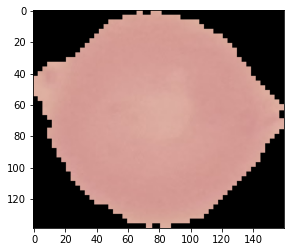

In [16]:
plt.imshow(imread(uninfected_cell))

In [17]:
len(os.listdir(train_path+"parasitized"))

12480

In [18]:
len(os.listdir(train_path+"uninfected"))

12480

In [19]:
len(os.listdir(test_path+"parasitized")),len(os.listdir(test_path+"uninfected"))

(1300, 1300)

In [20]:
dim1 =[]
dim2 =[]

for image_filename in os.listdir(test_path+"uninfected"):
    
    img =imread(test_path+"uninfected\\"+image_filename)
    d1,d2,colors=img.shape
    dim1.append(d1)    
    dim2.append(d2)

In [21]:
dim1[:10]

[118, 172, 130, 163, 172, 139, 151, 160, 145, 127]

In [22]:
dim2[:10]

[118, 145, 151, 145, 139, 136, 160, 121, 142, 121]

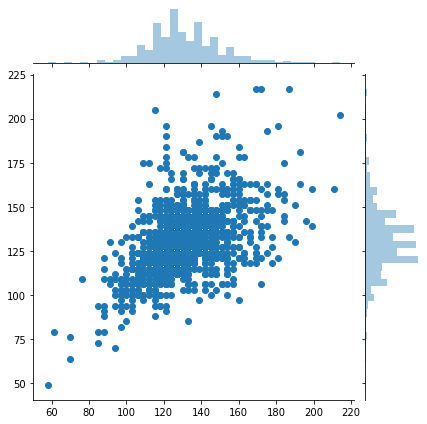

In [23]:
sns.jointplot(dim1,dim2)

In [24]:
np.mean(dim1),np.mean(dim2)

(130.92538461538462, 130.75)

In [25]:
image_shape=(130,130,3)

In [26]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

image_gen =ImageDataGenerator(rotation_range =20,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                             shear_range=0.1,
                             zoom_range=0.1,
                             horizontal_flip=True,
                             fill_mode="nearest")

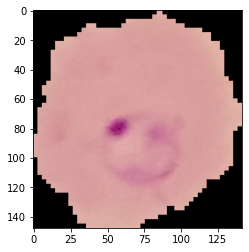

In [27]:
para_img=imread(para_cell)
plt.imshow(para_img)

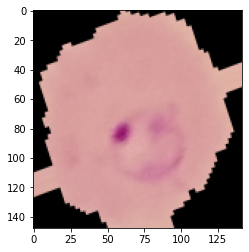

In [28]:
plt.imshow(image_gen.random_transform(para_img))

In [29]:
image_gen.flow_from_directory(train_path)
image_gen.flow_from_directory(test_path)

Found 24958 images belonging to 2 classes.
Found 2600 images belonging to 2 classes.


In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Dropout,Flatten

model =Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=image_shape,activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=image_shape,activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=image_shape,activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation="relu"))
model.add(Dropout(0.5))


model.add(Dense(1,activation="sigmoid"))

In [31]:
model.compile(loss="binary_crossentropy",
             optimizer="adam",
             metrics=["accuracy"])

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0

In [37]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping =EarlyStopping(monitor="val_loss",patience=2)

In [38]:
batch_size=32


In [40]:
train_img_gen=image_gen.flow_from_directory(train_path,
                                            target_size=image_shape[:2],
                                            color_mode="rgb",
                                            batch_size=batch_size,
                                            class_mode="binary")

test_img_gen=image_gen.flow_from_directory( test_path,
                                            target_size=image_shape[:2],
                                            color_mode="rgb",
                                            batch_size=batch_size,
                                            class_mode="binary",
                                            shuffle=False)

Found 24958 images belonging to 2 classes.
Found 2600 images belonging to 2 classes.


In [42]:
train_img_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [46]:
# results=model.fit(train_img_gen,
#                            epochs=20,
#                            validation_data=test_img_gen,
#                            callbacks=[early_stopping])

In [47]:
from tensorflow.keras.models import load_model
model=load_model("malaria_detector.h5")

In [48]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0

In [50]:
model.evaluate(test_img_gen)

82/82 [==============================] - 41s 497ms/step - loss: 36.5883 - accuracy: 0.8746


[36.588321685791016, 0.8746153712272644]

In [52]:
preds=model.predict(test_img_gen)

In [53]:
preds

array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [0.],
       [0.]], dtype=float32)

In [59]:
predictions =preds>0.8
predictions

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [False]])

In [60]:
len(preds)

2600

In [61]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(test_img_gen.classes,predictions))

              precision    recall  f1-score   support

           0       0.80      0.98      0.88      1300
           1       0.97      0.76      0.85      1300

    accuracy                           0.87      2600
   macro avg       0.89      0.87      0.87      2600
weighted avg       0.89      0.87      0.87      2600



In [62]:
confusion_matrix(test_img_gen.classes,predictions)

array([[1273,   27],
       [ 315,  985]], dtype=int64)

In [63]:
para_cell

'C:\\Users\\Acer\\Desktop\\Self Study\\Reinforcement Learning\\cell_images\\train\\parasitized\\C100P61ThinF_IMG_20150918_144104_cell_162.png'

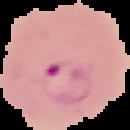

In [65]:
from tensorflow.keras.preprocessing import image
my_image=image.load_img(para_cell,target_size=image_shape)
my_image

In [67]:
my_image_array =image.img_to_array(my_image)
my_image_array.shape

(130, 130, 3)

In [69]:
image =np.expand_dims(my_image_array,axis=0)
image.shape

(1, 130, 130, 3)

In [70]:
model.predict(image)


array([[0.]], dtype=float32)

In [71]:
train_img_gen.class_indices

{'parasitized': 0, 'uninfected': 1}